# Data Cleaning 

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

prezzo_data = pd.read_csv('df_files/original_pizza_chain_dfs/prezzo_df.csv', encoding='utf-8')

## Data Inspection

In [137]:
def inspect_df_data(df):
    """
    This function finds how many null values there are for 
    each column within the given data frame.
    Parameters : 
        - df --> a Pandas DataFrame object
    """
    print("How many null values for each column: ")
    print(df.isna().sum())
    print("Data Types of each field: ")
    print(df.dtypes)
    print("The shape of the dataframe in form of (no. of columns,no.of rows): ")
    print(df.shape)

inspect_df_data(prezzo_data)

How many null values for each column: 
Unnamed: 0             0
Company Name           0
Title of Review        0
Review Description     0
Date of Review         0
No. of stars          40
dtype: int64
Data Types of each field: 
Unnamed: 0             int64
Company Name          object
Title of Review       object
Review Description    object
Date of Review        object
No. of stars          object
dtype: object
The shape of the dataframe in form of (no. of columns,no.of rows): 
(220, 6)


In [138]:
def drop_nulls(df):
    """ 
    This function drops nulls from 
    data frame
    """
    print(df.shape)
    df.dropna(inplace=True)
    print(df.shape)

drop_nulls(prezzo_data)

(220, 6)
(180, 6)


In [139]:
import emoji
import re
def remove_emojis(text):
    """
    Function that calculates all types of emojis and 
    eliminates any of these from text
    Parameters: 
        - text --> a str dtype
    Returns:
        - text with emoji patterns removed --> str dtype
    """
    emoji_pattern = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002500-\U00002BEF"  # chinese char
                        u"\U00002702-\U000027B0"
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        u"\U0001f926-\U0001f937"
                        u"\U00010000-\U0010ffff"
                        u"\u2640-\u2642"
                        u"\u2600-\u2B55"
                        u"\u200d"
                        u"\u23cf"
                        u"\u23e9"
                        u"\u231a"
                        u"\ufe0f"  # dingbats
                        u"\u3030"
                        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def apply_remove_emojis(df):
    """
    This function applies the one above to every row of a given
    data frame
    Parameters:
        - df --> Pandas object
    """
    df['Review Description'] = df['Review Description'].apply(remove_emojis)
    df['word_count'] = df['Review Description'].apply(lambda x: len(x.split()))

apply_remove_emojis(prezzo_data)
prezzo_data.head()

,Unnamed: 0,Company Name,Title of Review,Review Description,Date of Review,No. of stars,word_count
1,1,Prezzo,Shameful Customer Service - Prezzo @ The Light...,Well we thought what would be nicer than a fin...,"Oct 17, 2023",Rated 1 out of 5 stars,130
2,2,Prezzo,Prezzo Lakeside …,Prezzo Lakeside 3 of us had chicken Alfredo th...,"Oct 24, 2023",Rated 1 out of 5 stars,26
3,3,Prezzo,Had a meal at Prezzo in Bath,Had a meal at Prezzo in Bath. There was six of...,"Oct 20, 2023",Rated 3 out of 5 stars,82
4,4,Prezzo,Manager of Broughton restaurant was so…,Manager of Broughton restaurant was so rude wh...,"Oct 5, 2023",Rated 1 out of 5 stars,61
5,5,Prezzo,Poor food quality,We paid £60 For a meal that was very poor an...,"Updated Sep 23, 2023",Rated 1 out of 5 stars,84


In [140]:
def rate_mapping(text):
    """
    This minimises the text in the ratings column for 
    easier processing.
    Parameters:
        - text --> str dtype
    Returns:
        - returns the value of it's key (in this case,
                                        the parameter 
                                        'text'
                                        )
    """
    dict = {'Rated 1 out of 5 stars':'1 star',
            'Rated 2 out of 5 stars':'2 stars',
            'Rated 3 out of 5 stars':'3 stars',
            'Rated 4 out of 5 stars':'4 stars',
            'Rated 5 out of 5 stars':'5 stars',}
    return dict[text]
def change_rating_format(df):
    df['No. of stars'] = df['No. of stars'].apply(rate_mapping)

change_rating_format(prezzo_data)
prezzo_data.head()

,Unnamed: 0,Company Name,Title of Review,Review Description,Date of Review,No. of stars,word_count
1,1,Prezzo,Shameful Customer Service - Prezzo @ The Light...,Well we thought what would be nicer than a fin...,"Oct 17, 2023",1 star,130
2,2,Prezzo,Prezzo Lakeside …,Prezzo Lakeside 3 of us had chicken Alfredo th...,"Oct 24, 2023",1 star,26
3,3,Prezzo,Had a meal at Prezzo in Bath,Had a meal at Prezzo in Bath. There was six of...,"Oct 20, 2023",3 stars,82
4,4,Prezzo,Manager of Broughton restaurant was so…,Manager of Broughton restaurant was so rude wh...,"Oct 5, 2023",1 star,61
5,5,Prezzo,Poor food quality,We paid £60 For a meal that was very poor an...,"Updated Sep 23, 2023",1 star,84


I am not sure about this......

In [141]:
def create_nlp_data(df):
    selected_columns = ['Review Description','No. of stars', 'Date of Review']
    new_df = df[selected_columns]
    return new_df

prezzo_nltk_process = create_nlp_data(prezzo_data)
prezzo_nltk_process.head()

,Review Description,No. of stars,Date of Review
1,Well we thought what would be nicer than a fin...,1 star,"Oct 17, 2023"
2,Prezzo Lakeside 3 of us had chicken Alfredo th...,1 star,"Oct 24, 2023"
3,Had a meal at Prezzo in Bath. There was six of...,3 stars,"Oct 20, 2023"
4,Manager of Broughton restaurant was so rude wh...,1 star,"Oct 5, 2023"
5,We paid £60 For a meal that was very poor an...,1 star,"Updated Sep 23, 2023"


### Eliminate the word "Updated" from the 'Date of Review'
- This is so I do not get an error when I convert it to date/time type in Power BI

In [142]:
def eliminate_updated(text):
    """ Removes updated from given string """
    lst = text.split()
    if 'updated' in lst:
        lst.remove('updated')
    return " ".join(lst)

test_sentence = "I updated this"
print(eliminate_updated(test_sentence))

def apply_eliminate_update(df):
    # Apply method above to every row in given dataframe 
    df['Date of Review'] = df['Date of Review'].apply(eliminate_updated)

apply_eliminate_update(prezzo_data)
#prezzo_data = prezzo_data.drop("Date", axis=1)
prezzo_data.head(10)

I this


,Unnamed: 0,Company Name,Title of Review,Review Description,Date of Review,No. of stars,word_count
1,1,Prezzo,Shameful Customer Service - Prezzo @ The Light...,Well we thought what would be nicer than a fin...,"Oct 17, 2023",1 star,130
2,2,Prezzo,Prezzo Lakeside …,Prezzo Lakeside 3 of us had chicken Alfredo th...,"Oct 24, 2023",1 star,26
3,3,Prezzo,Had a meal at Prezzo in Bath,Had a meal at Prezzo in Bath. There was six of...,"Oct 20, 2023",3 stars,82
4,4,Prezzo,Manager of Broughton restaurant was so…,Manager of Broughton restaurant was so rude wh...,"Oct 5, 2023",1 star,61
5,5,Prezzo,Poor food quality,We paid £60 For a meal that was very poor an...,"Updated Sep 23, 2023",1 star,84
6,6,Prezzo,Cambridge Prezzo Appalling,"Forgotten about once seated. During order, wai...","Sep 7, 2023",1 star,88
7,7,Prezzo,Chelmsford restaurant,"Chelmsford restaurant. Waitress miserable, rat...","Aug 18, 2023",1 star,37
8,8,Prezzo,Popped into Prezzo - fabulous server!,"Popped into Prezzo, Lakeside to redeem a Birt...","Apr 15, 2023",5 stars,60
10,10,Prezzo,PREZZO at its BEST !,"PREZZO Restaraunt, at St. Peters Hill, Grantha...","Jun 5, 2023",5 stars,93
11,11,Prezzo,Surprised that thus restaurant is…,Surprised that thus restaurant is opened in ce...,"Oct 3, 2023",2 stars,32


### I create a new column that calculates whether given rating is negative, positive, neutral
- This is for Power BI purposes

In [143]:
def sentiment_level_decider(rating):
    if rating == "1 star" or rating == "2 stars":
        return "Negative"
    elif rating == "3 stars":
        return "Neutral"
    else:
        return "Positive"
    
def sentiment_level_column(df):
    df['Sentiment Level'] = df['No. of stars'].apply(sentiment_level_decider)

sentiment_level_column(prezzo_data)

prezzo_data.head()

,Unnamed: 0,Company Name,Title of Review,Review Description,Date of Review,No. of stars,word_count,Sentiment Level
1,1,Prezzo,Shameful Customer Service - Prezzo @ The Light...,Well we thought what would be nicer than a fin...,"Oct 17, 2023",1 star,130,Negative
2,2,Prezzo,Prezzo Lakeside …,Prezzo Lakeside 3 of us had chicken Alfredo th...,"Oct 24, 2023",1 star,26,Negative
3,3,Prezzo,Had a meal at Prezzo in Bath,Had a meal at Prezzo in Bath. There was six of...,"Oct 20, 2023",3 stars,82,Neutral
4,4,Prezzo,Manager of Broughton restaurant was so…,Manager of Broughton restaurant was so rude wh...,"Oct 5, 2023",1 star,61,Negative
5,5,Prezzo,Poor food quality,We paid £60 For a meal that was very poor an...,"Updated Sep 23, 2023",1 star,84,Negative


### Data Cleaning 
- Import nltk and its' necessary datasets and modules
    - Names : For filtering out names from given text
    - stopwords : words that do not provide valuable meaning for the purpose of the project, e.g., 'I', 'me','for'
    - averaged_perceptron_tagger : helps categorise words into their Part Of Speech (POS)
    - vader_lexicon : List of words and jargon nltk references for sentiment analysis
- I use NLTK for tokenization, Lemmatization and removing unnecessary words

In [144]:
import nltk
nltk.download([
    "names",
    "stopwords",
    "averaged_perceptron_tagger",
    "vader_lexicon",
    "punkt"
])
stopwords = nltk.corpus.stopwords.words("english")
words_to_eliminate = []
words_to_eliminate.extend(stopwords)
print(words_to_eliminate)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\sasha\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sasha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sasha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sasha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sasha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Tokenize Text with NLTK

In [145]:
def tokenize_text(text):
    # splits text into tokens (words)
    # Parameters :
    # - text --> type str
    return nltk.word_tokenize(text)

def filter_text(words):
    """ 
    Makes every word become lowercase and eliminates words 
    that are in the words_to_eliminate list
    """
    words = [w.lower() for w in words if w.isalpha()]
    words = [w for w in words if w not in words_to_eliminate]
    return words
prezzo_data['Review Description'] = prezzo_data['Review Description'].apply(tokenize_text)
prezzo_data['Review Description'] = prezzo_data['Review Description'].apply(filter_text)
prezzo_data.head()

,Unnamed: 0,Company Name,Title of Review,Review Description,Date of Review,No. of stars,word_count,Sentiment Level
1,1,Prezzo,Shameful Customer Service - Prezzo @ The Light...,"[well, thought, would, nicer, fine, meal, gig,...","Oct 17, 2023",1 star,130,Negative
2,2,Prezzo,Prezzo Lakeside …,"[prezzo, lakeside, us, chicken, alfredo, whole...","Oct 24, 2023",1 star,26,Negative
3,3,Prezzo,Had a meal at Prezzo in Bath,"[meal, prezzo, bath, six, us, marsal, chicken,...","Oct 20, 2023",3 stars,82,Neutral
4,4,Prezzo,Manager of Broughton restaurant was so…,"[manager, broughton, restaurant, rude, cash, u...","Oct 5, 2023",1 star,61,Negative
5,5,Prezzo,Poor food quality,"[paid, meal, poor, substandard, prezzo, burger...","Updated Sep 23, 2023",1 star,84,Negative


### Lemmatize verbs
This helps shortens words but maintains its' meaning 
- e.g., change 'running' to 'run'
I chose not to do stemming because stemming could lose the word's meaning, misleading a company

In [146]:
import nltk
from nltk.stem import WordNetLemmatizer

# downloads below are reference for the lemmatizer
nltk.download('wordnet') 
nltk.download('omw-1.4')

def lemmatize_text(text):
    # pos v refers to verbs
    lem_text = [WordNetLemmatizer().lemmatize(i, pos='v') for i in text]
    return lem_text

prezzo_data['Review Description'] = prezzo_data['Review Description'].apply(lemmatize_text)


def remove_other_words(text):
    # removes words I found that come up too often in the reviews for analysis
    unwanted_word_list = ['prezzo', 'restaurant', 'service', 'experience']
    words = [word for word in text if word not in unwanted_word_list]
    return words
prezzo_data['Review Description'] = prezzo_data['Review Description'].apply(remove_other_words)
prezzo_data = prezzo_data.reset_index(drop=True)
prezzo_data.head(10)



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sasha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sasha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Unnamed: 0,Company Name,Title of Review,Review Description,Date of Review,No. of stars,word_count,Sentiment Level
0,1,Prezzo,Shameful Customer Service - Prezzo @ The Light...,"[well, think, would, nicer, fine, meal, gig, a...","Oct 17, 2023",1 star,130,Negative
1,2,Prezzo,Prezzo Lakeside …,"[lakeside, us, chicken, alfredo, whole, breast...","Oct 24, 2023",1 star,26,Negative
2,3,Prezzo,Had a meal at Prezzo in Bath,"[meal, bath, six, us, marsal, chicken, chicken...","Oct 20, 2023",3 stars,82,Neutral
3,4,Prezzo,Manager of Broughton restaurant was so…,"[manager, broughton, rude, cash, us, say, tell...","Oct 5, 2023",1 star,61,Negative
4,5,Prezzo,Poor food quality,"[pay, meal, poor, substandard, burger, fry, wh...","Updated Sep 23, 2023",1 star,84,Negative
5,6,Prezzo,Cambridge Prezzo Appalling,"[forget, seat, order, waitress, refuse, take, ...","Sep 7, 2023",1 star,88,Negative
6,7,Prezzo,Chelmsford restaurant,"[chelmsford, waitress, miserable, rather, say,...","Aug 18, 2023",1 star,37,Negative
7,8,Prezzo,Popped into Prezzo - fabulous server!,"[pop, lakeside, redeem, birthday, fizz, offer,...","Apr 15, 2023",5 stars,60,Positive
8,10,Prezzo,PREZZO at its BEST !,"[restaraunt, peters, hill, grantham, wife, mid...","Jun 5, 2023",5 stars,93,Positive
9,11,Prezzo,Surprised that thus restaurant is…,"[surprise, thus, open, central, pizza, far, pr...","Oct 3, 2023",2 stars,32,Negative


In [147]:
del prezzo_data['Unnamed: 0']
prezzo_data.head()

,Company Name,Title of Review,Review Description,Date of Review,No. of stars,word_count,Sentiment Level
0,Prezzo,Shameful Customer Service - Prezzo @ The Light...,"[well, think, would, nicer, fine, meal, gig, a...","Oct 17, 2023",1 star,130,Negative
1,Prezzo,Prezzo Lakeside …,"[lakeside, us, chicken, alfredo, whole, breast...","Oct 24, 2023",1 star,26,Negative
2,Prezzo,Had a meal at Prezzo in Bath,"[meal, bath, six, us, marsal, chicken, chicken...","Oct 20, 2023",3 stars,82,Neutral
3,Prezzo,Manager of Broughton restaurant was so…,"[manager, broughton, rude, cash, us, say, tell...","Oct 5, 2023",1 star,61,Negative
4,Prezzo,Poor food quality,"[pay, meal, poor, substandard, burger, fry, wh...","Updated Sep 23, 2023",1 star,84,Negative


In [162]:
# save finalized data to csv file for power bi analyis
with open('df_files/final_pizza_chain_dfs/final_prezzo_data.csv', 'w', encoding='utf-8') as f:
    prezzo_data.to_csv(f)


### This section here derives words from positive, negative, neutral reviews then sorts them to its corresponding lists for future visualisations

In [149]:
positive_words = []
negative_words = []
neutral_words = []

"""
These methods below sorts words into the correct semantic list
     Parameter: text --> string (a review)
"""
def add_positive_words_to_lists(text):
    for word in text:
        positive_words.append(word)

def add_negative_words_to_lists(text):
    for word in text:
        negative_words.append(word)

def add_neutral_words_to_lists(text):
    for word in text:
        neutral_words.append(word)

# These calls the functions above when it goes through each line
# of the data frame 
for index, row in prezzo_data.iterrows():
    #print("No error")
    if 'Positive' in row['Sentiment Level']:
        add_positive_words_to_lists(row['Review Description'])
    elif 'Negative' in row['Sentiment Level']:
        add_negative_words_to_lists(row['Review Description'])
    else:
        add_neutral_words_to_lists(row['Review Description'])

print(len(positive_words))
print(len(negative_words))
print(len(neutral_words))




1650
4763
299


### Create frequency distributions of words for each category
- Then remove words that these groups have in common from each other

In [150]:
positive_fd = nltk.FreqDist(positive_words)
negative_fd = nltk.FreqDist(negative_words)
neutral_fd = nltk.FreqDist(neutral_words)

# This eliminates any common words between negative_fd and positive_fd 
# helps reduce bias
common_set = set(positive_fd).intersection(negative_fd).intersection(neutral_fd)
for word in common_set:
    del positive_fd[word]
    del negative_fd[word]
    del neutral_fd[word]

common_pair_one = set(positive_fd).intersection(negative_fd)
print(len(common_pair_one))

294


In [151]:
for word in common_pair_one:
    del positive_fd[word]
    del negative_fd[word]

print(len(positive_fd))
print(len(negative_fd))

298
1056


In [152]:
# This eliminates any common words between neutral_fd and positive_fd 
common_pair_two = set(positive_fd).intersection(neutral_fd)
# This eliminates any common words between negative_fd and neutral_fd 
common_pair_three = set(negative_fd).intersection(neutral_fd)

for word in common_pair_two:
    del positive_fd[word]
    del neutral_fd[word]

for word in common_pair_three:
    del negative_fd[word]
    del neutral_fd[word]

print(f'length of positive fd: {len(positive_fd)}')
print(f'length of negative fd: {len(negative_fd)}')
print(f'length of neutral fd: {len(neutral_fd)}')

length of positive fd: 289
length of negative fd: 1002
length of neutral fd: 35


### Build Data Frames for Each Category Distribution and Save Them onto a File

#### Positive Word Frequency Data Frame

In [153]:
pos_freq_df = pd.DataFrame(list(positive_fd.items()), columns=['Word', 'Frequency'])
pos_freq_df = pos_freq_df.sort_values(by="Frequency", ascending=False)
pos_freq_df = pos_freq_df.reset_index(drop=True)
pos_freq_df.head(10)

# saves to df_files directory
with open('df_files/prezzo_semantic_dfs/positive_words_df.csv', 'w', encoding='utf-8') as f:
    pos_freq_df.to_csv(f)




In [154]:
pos_freq_df.head()

,Word,Frequency
0,fabulous,6
1,banstead,5
2,brilliant,5
3,din,5
4,outstanding,4


### Negative Word Frequency Data Frame

In [155]:
neg_freq_df = pd.DataFrame(list(negative_fd.items()), columns=['Word', 'Frequency'])
neg_freq_df = neg_freq_df.sort_values(by="Frequency", ascending=False)
neg_freq_df = neg_freq_df.reset_index(drop=True)
neg_freq_df.head(10)

with open('df_files/prezzo_semantic_dfs/negative_words_df.csv', 'w', encoding='utf-8') as f:
    neg_freq_df.to_csv(f)

In [156]:
neg_freq_df.head()

,Word,Frequency
0,minutes,13
1,money,13
2,piece,12
3,daughter,11
4,later,10


#### Neutral Word Frequency Data Frame

In [157]:
neu_freq_df = pd.DataFrame(list(neutral_fd.items()), columns=['Word', 'Frequency'])
neu_freq_df = neu_freq_df.sort_values(by="Frequency", ascending=False)
neu_freq_df = neu_freq_df.reset_index(drop=True)
neu_freq_df.head(10)

with open('df_files/prezzo_semantic_dfs/neutral_words_df.csv', 'w', encoding='utf-8') as f:
    neu_freq_df.to_csv(f)

In [158]:
neu_freq_df.head()

,Word,Frequency
0,six,1
1,pre,1
2,selection,1
3,selections,1
4,note,1


### Visualise the data to see what it looks like before moving onto Power BI

C:\Users\sasha\AppData\Local\Temp\ipykernel_45032\3428062138.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Word",y="Frequency",data=df, palette='hls',ax=ax)


<AxesSubplot: xlabel='Word', ylabel='Frequency'>

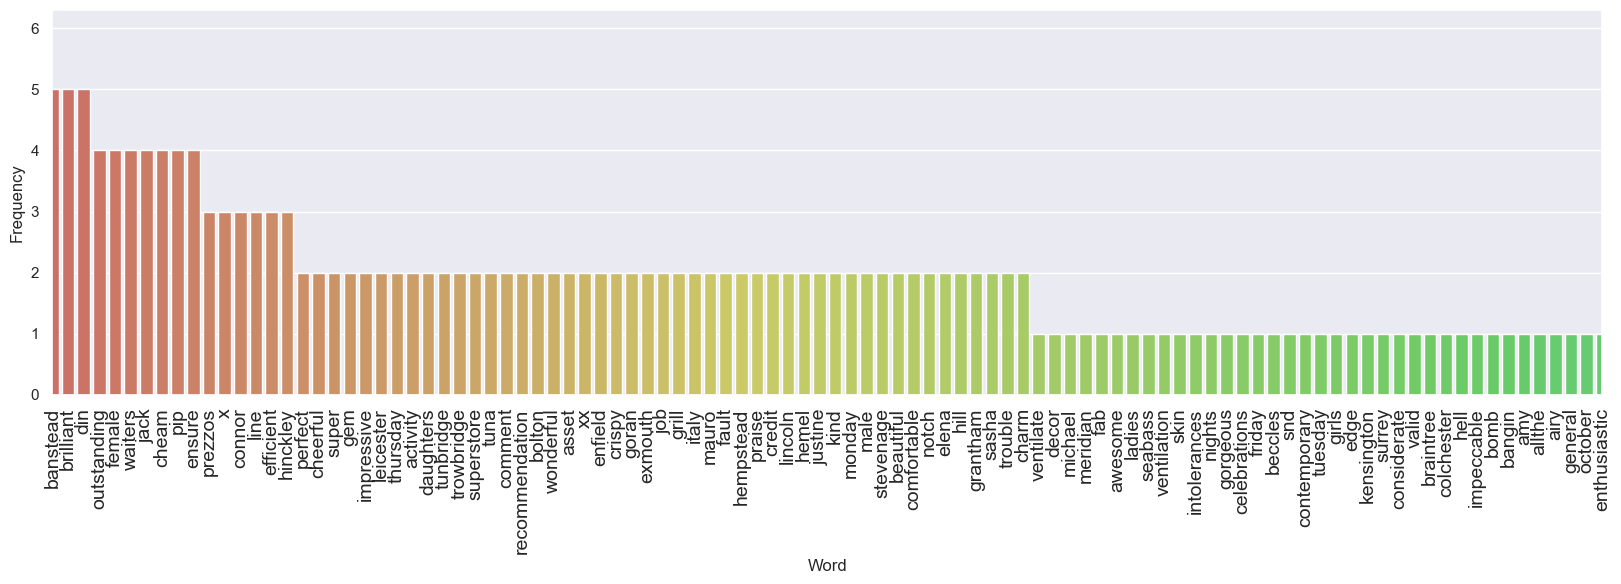

In [159]:
import seaborn as sns
sns.set()
def word_frequency_barplot(df):
    """ df should have a column named count.
    """
    fig, ax = plt.subplots(1,1,figsize=(20,5))

    sns.barplot(x="Word",y="Frequency",data=df, palette='hls',ax=ax)

    ax.set_xticks(list(range(len(df))))
    ax.set_xticklabels(df.Word[:], fontsize=14, rotation=90)
    ax.set_xlim(1,100)
    return ax

word_frequency_barplot(pos_freq_df)

## Below are experimentation and a part of the Future State 
- I would like to build 

In [160]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
def is_positive(review):
    return sia.polarity_scores(review)['compound'] > 0

def is_negative(review):
    return sia.polarity_scores(review)['compound'] < 0

def is_neutral(review):
    return sia.polarity_scores(review)['compound'] == 0

positive_reviews = []
neutral_reviews = []
negative_reviews = []

i = 0
for review in id2review:
    
    if is_positive(review[1]):
        positive_reviews.append(id2review[i])
    else:
        negative_reviews.append(id2review[i])
    i += 1


NameError: name 'id2review' is not defined

In [ ]:
print(len(positive_reviews))
print(len(negative_reviews))

0
181


In [ ]:
positive_fd = nltk.FreqDist(positive_words)
negative_fd = nltk.FreqDist(negative_words)
print(len(positive_fd))
common_set = set(positive_fd).intersection(negative_fd)
print("Length of common set: ", len(common_set))
print(len(common_set))
for word in common_set:
    del positive_fd[word]
    del negative_fd[word]

top_100_positive = {word for word, count in positive_fd.most_common(10)}
top_100_negative = {word for word, count in negative_fd.most_common(10)}


1
Length of common set:  1
1


In [ ]:
print(top_100_positive)
print(top_100_negative)

set()
{'r', 'a', 'i', 'h', 't', 'e', 'n', 's', 'o', 'd'}


In [ ]:
from nltk.util import ngrams

def extract_ngrams(text,num = 2):
    n_grams = ngrams(text, num)
    return [ ' '.join(grams) for grams in n_grams]

print(extract_ngrams(id2review[0][1]))

['P  ', '  r', 'r  ', '  e', 'e  ', '  z', 'z  ', '  z', 'z  ', '  o', 'o  ', '   ', '   ', '  L', 'L  ', '  a', 'a  ', '  k', 'k  ', '  e', 'e  ', '  s', 's  ', '  i', 'i  ', '  d', 'd  ', '  e', 'e  ', '   ', '   ', '  3', '3  ', '   ', '   ', '  o', 'o  ', '  f', 'f  ', '   ', '   ', '  u', 'u  ', '  s', 's  ', '   ', '   ', '  h', 'h  ', '  a', 'a  ', '  d', 'd  ', '   ', '   ', '  c', 'c  ', '  h', 'h  ', '  i', 'i  ', '  c', 'c  ', '  k', 'k  ', '  e', 'e  ', '  n', 'n  ', '   ', '   ', '  A', 'A  ', '  l', 'l  ', '  f', 'f  ', '  r', 'r  ', '  e', 'e  ', '  d', 'd  ', '  o', 'o  ', '   ', '   ', '  t', 't  ', '  h', 'h  ', '  e', 'e  ', '  r', 'r  ', '  e', 'e  ', '   ', '   ', '  w', 'w  ', '  a', 'a  ', '  s', 's  ', '  n', 'n  ', '  ’', '’  ', '  t', 't  ', '   ', '   ', '  a', 'a  ', '   ', '   ', '  w', 'w  ', '  h', 'h  ', '  o', 'o  ', '  l', 'l  ', '  e', 'e  ', '   ', '   ', '  b', 'b  ', '  r', 'r  ', '  e', 'e  ', '  a', 'a  ', '  s', 's  ', '  t', 't  ', '   ', '   '

In [ ]:
prezzo_nltk_process['bigrams'] = prezzo_nltk_process['Review Description'].apply(extract_ngrams)
prezzo_nltk_process.head()

C:\Users\sasha\AppData\Local\Temp\ipykernel_8416\273733830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prezzo_nltk_process['bigrams'] = prezzo_nltk_process['Review Description'].apply(extract_ngrams)


,Review Description,No. of stars,Date of Review,bigrams
0,Prezzo Lakeside 3 of us had chicken Alfredo th...,1 star,"Oct 24, 2023","[P r, r e, e z, z z, z o, o , L, L a, a k, ..."
1,Well we thought what would be nicer than a fin...,1 star,"Oct 17, 2023","[W e, e l, l l, l , w, w e, e , t, t h, ..."
2,Had a meal at Prezzo in Bath. There was six of...,3 stars,"Oct 20, 2023","[H a, a d, d , a, a , m, m e, e a, a l, ..."
3,Manager of Broughton restaurant was so rude wh...,1 star,"Oct 5, 2023","[M a, a n, n a, a g, g e, e r, r , o, o f, ..."
4,We paid £60 For a meal that was very poor an...,1 star,"Updated Sep 23, 2023","[W e, e , p, p a, a i, i d, d , £, £ 6, ..."


In [ ]:
example = prezzo_nltk_process.at[4, 'bigrams']
print(example)
count_neg = 0
count_pos = 0
count_neu = 0
for bigram in example:
    if is_positive(bigram):
        print(True)
        print(sia.polarity_scores(bigram))
        count_pos += 1
    elif is_neutral(bigram):
        print("Neutral")
        print(sia.polarity_scores(bigram))
        count_neu += 1
    else:
        print(False)
        print(sia.polarity_scores(bigram))
        count_neg += 1

print("Number of Positives: ", count_pos)
print("Number of neutrals: ", count_neu)
print("Number of negatives: ", count_neg)

['W e', 'e  ', '  p', 'p a', 'a i', 'i d', 'd  ', '  £', '£ 6', '6 0', '0  ', '   ', '   ', '  F', 'F o', 'o r', 'r  ', '  a', 'a  ', '  m', 'm e', 'e a', 'a l', 'l  ', '  t', 't h', 'h a', 'a t', 't  ', '  w', 'w a', 'a s', 's  ', '  v', 'v e', 'e r', 'r y', 'y  ', '  p', 'p o', 'o o', 'o r', 'r  ', '  a', 'a n', 'n d', 'd  ', '  s', 's u', 'u b', 'b s', 's t', 't a', 'a n', 'n d', 'd a', 'a r', 'r d', 'd  ', '   ', '   ', '   ', '  t', 't h', 'h e', 'e  ', '  P', 'P r', 'r e', 'e z', 'z z', 'z o', 'o  ', '  b', 'b u', 'u r', 'r g', 'g e', 'e r', 'r  ', '  a', 'a n', 'n d', 'd  ', '  f', 'f r', 'r i', 'i e', 'e s', 's  ', '  a', 'a t', 't  ', '  a', 'a  ', '  w', 'w h', 'h o', 'o p', 'p p', 'p i', 'i n', 'n g', 'g  ', '  £', '£ £', '£  ', '   ', '   ', '  T', 'T h', 'h e', 'e  ', '  b', 'b u', 'u r', 'r g', 'g e', 'e r', 'r  ', '  b', 'b u', 'u n', 'n  ', '  w', 'w a', 'a s', 's  ', '  b', 'b u', 'u r', 'r n', 'n t', 't  ', '  n', 'n o', 'o  ', '  f', 'f i', 'i l', 'l l', 'l i', 'i n'

In [ ]:
def make_scores(text):
    count_neg = 0
    count_pos = 0
    count_neu = 0
    for word in text:
        if is_positive(word):
            count_pos += 1
        elif is_neutral(word):
            count_neu += 1
        else:
            count_neg += 1
    print(count_neu)
    print(count_pos)
    print(count_neg)
    return decide_sentiment_comment(count_pos, 
                                    count_neg, 
                                    count_neu)
    
def decide_sentiment_comment(pos, negs, neu):
    if pos > negs and pos > neu:
        print("Positive")
        return "Positive"
    elif neu >pos and neu > negs:
        return "Neutral"
    elif negs > pos and negs > neu:
        return "Negative"
    else:
        pass
    
prezzo_nltk_process['Sentiment Level'] = prezzo_nltk_process['Review Description'].apply(make_scores)
prezzo_nltk_process.head()


137
0
0
743
0
0
387
0
0
304
0
0
477
0
0
491
0
0
198
0
0
233
0
0
350
0
0
414
0
0
582
0
0
933
0
0
348
0
0
385
0
0
471
0
0
731
0
0
224
0
0


440
0
0
429
0
0
432
0
0
224
0
0
513
0
0
354
0
0
361
0
0
173
0
0
298
0
0
423
0
0
299
0
0
662
0
0
485
0
0
550
0
0
426
0
0
344
0
0
367
0
0
679
0
0
400
0
0
266
0
0
463
0
0
565
0
0
407
0
0
1126
0
0
384
0
0
432
0
0
347
0
0
360
0
0
330
0
0
262
0
0
316
0
0
474
0
0
435
0
0
805
0
0
634
0
0
284
0
0
180
0
0
503
0
0
584
0
0
506
0
0
279
0
0
351
0
0
594
0
0
184
0
0
508
0
0
588
0
0
385
0
0
498
0
0
625
0
0
604
0
0
365
0
0
179
0
0
796
0
0
410
0
0
400
0
0
190
0
0
99
0
0
743
0
0
208
0
0
570
0
0
616
0
0
268
0
0
163
0
0
596
0
0
169
0
0
211
0
0
374
0
0
195
0
0
263
0
0
251
0
0
753
0
0
317
0
0
870
0
0
955
0
0
399
0
0
162
0
0
959
0
0
267
0
0
277
0
0
466
0
0
1159
0
0
153
0
0
859
0
0
1024
0
0
209
0
0
118
0
0
997
0
0
157
0
0
661
0
0
441
0
0
1132
0
0
157
0
0
844
0
0
164
0
0
209
0
0
225
0
0
233
0
0
261
0
0
125
0
0
1061
0
0
166
0
0
123
0
0
1156
0
0
144
0
0
229
0
0
493
0
0
158
0
0
135
0
0
1594
0
0
1431
0
0
891
0
0
118
0
0
106
0
0
140
0
0
134
0
0
1370
0
0
130
0
0
112
0
0
120
0
0
1696
0
0
1544
0
0
107
0
0
100
0
0
1924
0

C:\Users\sasha\AppData\Local\Temp\ipykernel_8416\713837175.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prezzo_nltk_process['Sentiment Level'] = prezzo_nltk_process['Review Description'].apply(make_scores)


,Review Description,No. of stars,Date of Review,bigrams,Sentiment Level
0,Prezzo Lakeside 3 of us had chicken Alfredo th...,1 star,"Oct 24, 2023","[P r, r e, e z, z z, z o, o , L, L a, a k, ...",Neutral
1,Well we thought what would be nicer than a fin...,1 star,"Oct 17, 2023","[W e, e l, l l, l , w, w e, e , t, t h, ...",Neutral
2,Had a meal at Prezzo in Bath. There was six of...,3 stars,"Oct 20, 2023","[H a, a d, d , a, a , m, m e, e a, a l, ...",Neutral
3,Manager of Broughton restaurant was so rude wh...,1 star,"Oct 5, 2023","[M a, a n, n a, a g, g e, e r, r , o, o f, ...",Neutral
4,We paid £60 For a meal that was very poor an...,1 star,"Updated Sep 23, 2023","[W e, e , p, p a, a i, i d, d , £, £ 6, ...",Neutral


In [ ]:
prezzo_nltk_process.head(10)

,Review Description,No. of stars,Date of Review,bigrams,Sentiment Level
0,Prezzo Lakeside 3 of us had chicken Alfredo th...,1 star,"Oct 24, 2023","[P r, r e, e z, z z, z o, o , L, L a, a k, ...",Neutral
1,Well we thought what would be nicer than a fin...,1 star,"Oct 17, 2023","[W e, e l, l l, l , w, w e, e , t, t h, ...",Neutral
2,Had a meal at Prezzo in Bath. There was six of...,3 stars,"Oct 20, 2023","[H a, a d, d , a, a , m, m e, e a, a l, ...",Neutral
3,Manager of Broughton restaurant was so rude wh...,1 star,"Oct 5, 2023","[M a, a n, n a, a g, g e, e r, r , o, o f, ...",Neutral
4,We paid £60 For a meal that was very poor an...,1 star,"Updated Sep 23, 2023","[W e, e , p, p a, a i, i d, d , £, £ 6, ...",Neutral
5,"Forgotten about once seated. During order, wai...",1 star,"Sep 7, 2023","[F o, o r, r g, g o, o t, t t, t e, e n, n , ...",Neutral
6,Surprised that thus restaurant is opened in ce...,2 stars,"Oct 3, 2023","[S u, u r, r p, p r, r i, i s, s e, e d, d , ...",Neutral
7,"Chelmsford restaurant. Waitress miserable, rat...",1 star,"Aug 18, 2023","[C h, h e, e l, l m, m s, s f, f o, o r, r d, ...",Neutral
9,"Popped into Prezzo, Lakeside to redeem a Birt...",5 stars,"Apr 15, 2023","[P o, o p, p p, p e, e d, d , i, i n, n t, ...",Neutral
10,Sent my husband for a take away pizza (Haverhi...,1 star,"Updated Jul 7, 2023","[S e, e n, n t, t , m, m y, y , h, h u, ...",Neutral


In [ ]:
def get_reviews(df):
    positive_reviews  = []
    negative_reviews = []
    neutral_reviews = []

    for index, row in df.iterrows():
        if row['Sentiment Level'] == 'Positive':
            positive_reviews.append(row['Review Description'])
        elif row['Sentiment Level'] == 'Neutral':
            neutral_reviews.append(row['Review Description'])
        else:
            negative_reviews.append(row['Review Description'])
    return positive_reviews, neutral_reviews, negative_reviews

In [ ]:
positive_reviews, neutral_reviews, negative_reviews = get_reviews(prezzo_nltk_process)


positive_words = []
negative_words = []
neutral_words = []


for review in positive_reviews:
    positive_text += review[1]
    positive_words.append(review[1])

for review in negative_reviews:
    negative_words.append(review[1])


for review in neutral_reviews:
    neutral_words.append(review[1])  

print(positive_words[0])


IndexError: list index out of range

In [ ]:
def get_reviews_bigrams(df):
    positive_reviews  = []
    negative_reviews = []
    neutral_reviews = []

    for index, row in df.iterrows():
        if row['Sentiment Level'] == 'Positive':
            positive_reviews.append(row['bigrams'])
        elif row['Sentiment Level'] == 'Neutral':
            neutral_reviews.append(row['bigrams'])
        else:
            negative_reviews.append(row['bigrams'])
    return positive_reviews, neutral_reviews, negative_reviews

In [ ]:
print(positive_words)

['think', 'thus', 'waitress', 'lakeside', 'peters', 'visitors', 'prebook', 'cheam', 'time', 'terrible', 'shepperton', 'give', 'go', 'table', 'food', 'get', 'branch', 'local', 'atmosphere', 'eltham', 'wellsfor', 'malvern', 'buckhurst', 'accommodate', 'negative', 'slow', 'aylesbury', 'trafalgar', 'table', 'service', 'st', 'aldeburgh', 'atmosphere', 'friendly', 'service', 'salford', 'fast', 'treat', 'main', 'visit', 'banstead', 'enfield', 'service', 'lyndhurst', 'first', 'room', 'whiteley', 'meal', 'meal', 'activity', 'east', 'cambridge', 'love', 'peterborough', 'go', 'bolton', 'decide', 'impress', 'redhill', 'kensington', 'customer', 'call', 'book', 'use', 'lincoln', 'time', 'staff', 'party', 'town', 'kings', 'buy', 'hinckley', 'close', 'spalding', 'whitely', 'service', 'local', 'best', 'weybridge', 'enjoy', 'food', 'tonight', 'meal', 'friends', 'service', 'gf', 'visit', 'service', 'order', 'ok', 'meal', 'service', 'mediocre', 'company', 'menu', 'branch', 'time', 'service', 'hemel', 'bra

In [ ]:
positive_fd = nltk.FreqDist(positive_words)
neutral_fd = nltk.FreqDist(neutral_words)
negative_fd = nltk.FreqDist(negative_words)
print(positive_fd)
print(negative_fd)
print(neutral_fd)
#common_set = set(positive_fd).intersection(negative_fd)
print("Length of common set: ", len(common_set))
print(set(negative_fd))
print(common_set)
"""print(len(common_set))
for word in common_set:
    del positive_fd[word]
    del negative_fd[word]

"""


top_100_positive = {word for word, count in positive_fd.most_common(100)}
top_100_negative = {word for word, count in negative_fd.most_common(100)}




<FreqDist with 88 samples and 112 outcomes>
<FreqDist with 57 samples and 69 outcomes>
<FreqDist with 0 samples and 0 outcomes>
Length of common set:  12
{'meal', 'use', 'time', 'northumberland', 'portion', 'eastleigh', 'quality', 'lakeside', 'side', 'near', 'swadlincote', 'much', 'attentive', 'bath', 'disgust', 'vanguard', 'december', 'back', 'windsor', 'branchabsolutely', 'refuse', 'slop', 'broughton', 'eat', 'delivery', 'experience', 'solent', 'thing', 'move', 'tonight', 'seat', 'wating', 'pay', 'email', 'today', 'branch', 'bland', 'town', 'disappoint', 'table', 'cross', 'wimborne', 'waitress', 'head', 'wrong', 'occasion', 'visit', 'decades', 'vegan', 'ask', 'place', 'husband', 'take', 'service', 'village', 'food', 'us'}
{'meal', 'use', 'waitress', 'time', 'visit', 'lakeside', 'food', 'service', 'branch', 'town', 'table', 'tonight'}


In [ ]:
print(top_100_negative)
print(top_100_positive)

{'meal', 'use', 'time', 'northumberland', 'portion', 'eastleigh', 'quality', 'lakeside', 'side', 'near', 'swadlincote', 'much', 'attentive', 'bath', 'disgust', 'vanguard', 'december', 'back', 'windsor', 'branchabsolutely', 'refuse', 'slop', 'broughton', 'eat', 'delivery', 'experience', 'solent', 'thing', 'move', 'tonight', 'seat', 'wating', 'pay', 'email', 'today', 'branch', 'bland', 'town', 'disappoint', 'table', 'cross', 'wimborne', 'waitress', 'head', 'wrong', 'occasion', 'visit', 'decades', 'vegan', 'ask', 'place', 'husband', 'take', 'service', 'village', 'food', 'us'}
{'meal', 'party', 'another', 'bolton', 'peters', 'enfield', 'surreyour', 'friend', 'prebook', 'slow', 'trafalgar', 'customer', 'impress', 'kings', 'love', 'give', 'time', 'order', 'buckhurst', 'beautiful', 'spalding', 'negative', 'malvern', 'treat', 'staff', 'lincoln', 'weybridge', 'fast', 'peterborough', 'best', 'menu', 'friendly', 'terrible', 'enjoy', 'east', 'tonight', 'hemel', 'room', 'gf', 'redhill', 'lakeside',

In [ ]:
import seaborn as sns 

pos_freq_df = pd.DataFrame(list(positive_fd.items()), columns=['Word', 'Frequency'])
pos_freq_df = pos_freq_df.sort_values(by="Frequency", ascending=False)
pos_freq_df = pos_freq_df.reset_index(drop=True)
pos_freq_df.head(10)


,Word,Frequency
0,service,8
1,meal,5
2,visit,3
3,branch,3
4,time,3
5,go,2
6,eltham,2
7,atmosphere,2
8,local,2
9,table,2


In [ ]:
neg_freq_df = pd.DataFrame(list(negative_fd.items()), columns=['Word', 'Frequency'])
neg_freq_df = neg_freq_df.sort_values(by="Frequency", ascending=False)
neg_freq_df = neg_freq_df.reset_index(drop=True)
neg_freq_df.head(10)

,Word,Frequency
0,experience,6
1,food,3
2,service,2
3,table,2
4,meal,2
5,tonight,2
6,eat,2
7,village,1
8,vegan,1
9,back,1


C:\Users\sasha\AppData\Local\Temp\ipykernel_8416\3565597410.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Word",y="Frequency",data=df, palette='hls',ax=ax)
C:\Users\sasha\AppData\Local\Temp\ipykernel_8416\3565597410.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Word",y="Frequency",data=df, palette='hls',ax=ax)


<AxesSubplot: xlabel='Word', ylabel='Frequency'>

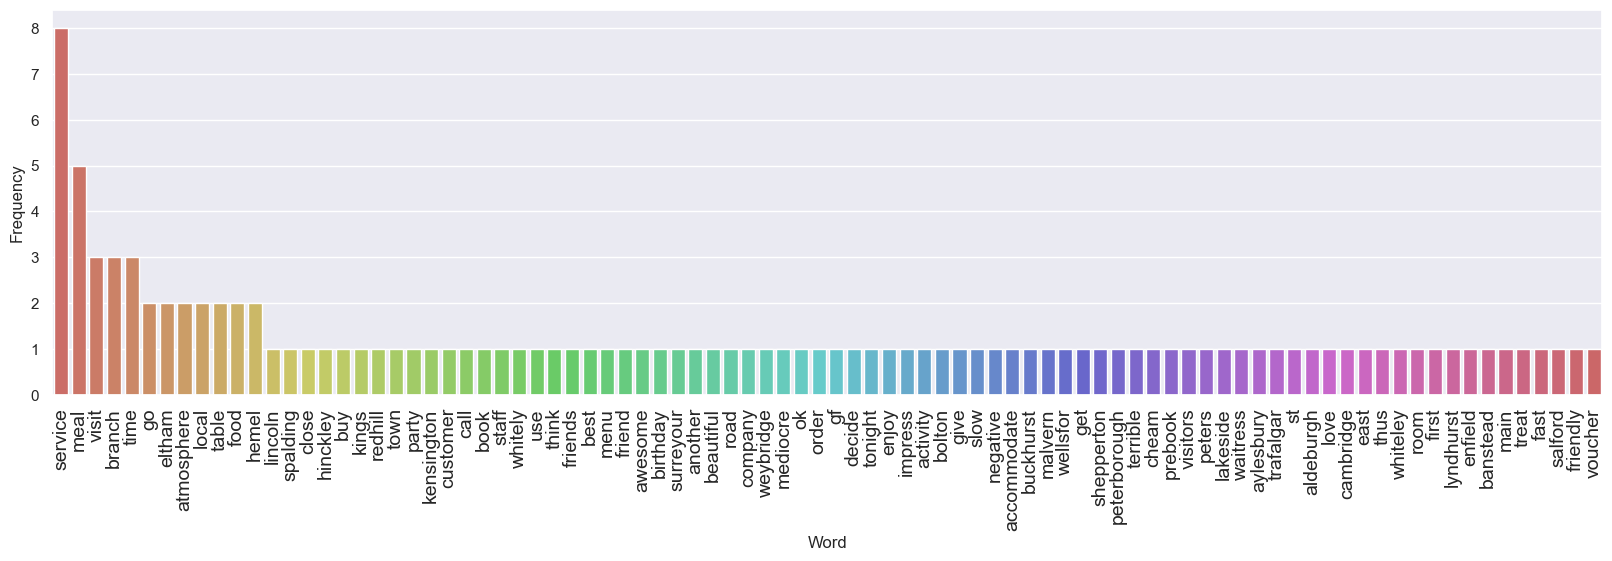

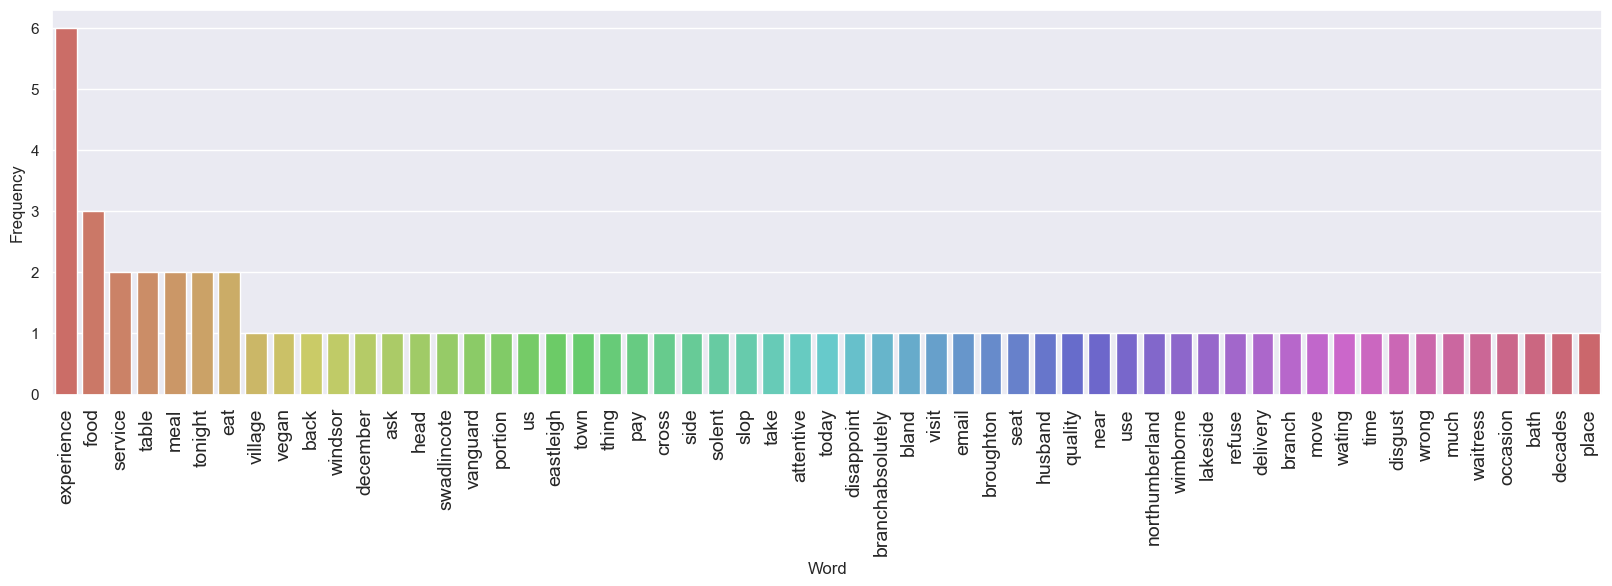

In [ ]:

word_frequency_barplot(pos_freq_df)
word_frequency_barplot(neg_freq_df)